### Keras Example: https://builtin.com/data-science/how-build-neural-network-keras

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

In [2]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
def vectorize(sequences, dimension = 10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results

In [4]:
data = vectorize(data)
targets = np.array(targets).astype("float32")
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

In [5]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500050    
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
__________________________________________________

In [6]:
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [7]:
history = model.fit(
 train_x, train_y,
 epochs= 100,
 batch_size = 500,
 validation_data = (test_x, test_y)
)

Epoch 1/100
80/80 [==============================] - 3s 24ms/step - loss: 0.5184 - accuracy: 0.7366 - val_loss: 0.2635 - val_accuracy: 0.8935
Epoch 2/100
80/80 [==============================] - 1s 16ms/step - loss: 0.2082 - accuracy: 0.9214 - val_loss: 0.2627 - val_accuracy: 0.8972
Epoch 3/100
80/80 [==============================] - 1s 15ms/step - loss: 0.1455 - accuracy: 0.9475 - val_loss: 0.2944 - val_accuracy: 0.8895
Epoch 4/100
80/80 [==============================] - 1s 15ms/step - loss: 0.0982 - accuracy: 0.9673 - val_loss: 0.3606 - val_accuracy: 0.8844
Epoch 5/100
80/80 [==============================] - 1s 15ms/step - loss: 0.0634 - accuracy: 0.9792 - val_loss: 0.4302 - val_accuracy: 0.8844
Epoch 6/100
80/80 [==============================] - 1s 15ms/step - loss: 0.0462 - accuracy: 0.9848 - val_loss: 0.4977 - val_accuracy: 0.8798
Epoch 7/100
80/80 [==============================] - 1s 15ms/step - loss: 0.0348 - accuracy: 0.9883 - val_loss: 0.4920 - val_accuracy: 0.8825
Epoch 

In [8]:
print("Test-Accuracy:", np.mean(history.history["val_accuracy"]))

Test-Accuracy: 0.8808379977941513


In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [10]:
results = model.evaluate(test_x, test_y)
results

313/313 [==============================] - 1s 4ms/step - loss: 0.9482 - accuracy: 0.8856


[0.9482020735740662, 0.8855999708175659]

In [11]:
model.predict(test_x)

array([[1.0000000e+00],
       [1.7857941e-25],
       [5.0914140e-23],
       ...,
       [1.0000000e+00],
       [1.3645132e-13],
       [1.4167052e-10]], dtype=float32)

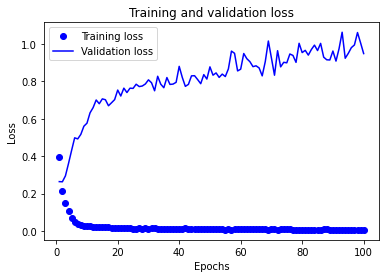

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

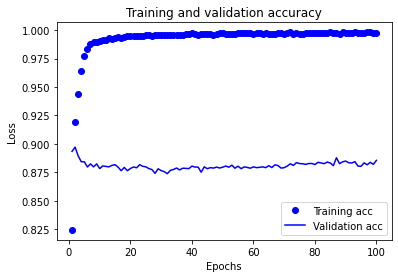

In [13]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()